<a href="https://colab.research.google.com/github/LuisPablo19/Evaluacion/blob/main/Evaluacion_etapa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 5 (Evaluación)**
##Luis Pablo Padilla Barbosa
##A00572040

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

In [81]:
EUA = pd.read_csv("California_EUA.csv", encoding = "unicode_escape")
Mexico = pd.read_csv("DF_Mexico.csv")
Espana = pd.read_csv("Girona_España.csv", encoding = "unicode_escape")

##**Estados Unidos**

###**Exploración**

En esta parte se empieza por eliminar las columnas en donde todos sus datos sean nulos, por lo que al final nos quedamos sin ninguna columna vacía. 

Posteriormente, se dividieron los datos en aquellos que tengan variables numéricas y aquellas que cuentan con variables categóricas. 

In [82]:
EUA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [83]:
EUA = EUA.dropna(axis = 1, how='all')
EUA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [84]:
EUA.isnull().sum().sum()

28069

In [85]:
numericas = EUA._get_numeric_data()
categoricas = EUA.drop(numericas, axis = 1)

###**Limpieza de datos (numéricos)**
En este punto se aplicó la función fillna para que se completaran los datos nulos con el promedio de la fila, puesto que se consideró que de esa forma no iba a afectar en cuanto a la distribución de los datos y nos permitiría poder explorar la información mantiendo casi las mismas caraceterísticas. 

Posteriormente se aplicó el método de los cuartiles para poder eliminar los valores atípicos. La razón por la cual se aplicó este método es debido a que es mucho más estricto al momento de considerar cuales datos son y cuales no son outliers. 

In [86]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   scrape_id                                     6936 non-null   float64
 2   host_id                                       6936 non-null   int64  
 3   host_listings_count                           6936 non-null   int64  
 4   host_total_listings_count                     6936 non-null   int64  
 5   latitude                                      6936 non-null   float64
 6   longitude                                     6936 non-null   float64
 7   accommodates                                  6936 non-null   int64  
 8   bedrooms                                      5991 non-null   float64
 9   beds                                          6816 non-null   f

In [87]:
data = numericas.copy()
numericas = numericas.fillna(round(data.mean(),1))
numericas.isnull().sum().sum()

0

In [88]:
numericas = numericas.drop(["ï»¿id"], axis=1)

<Figure size 1500x800 with 0 Axes>

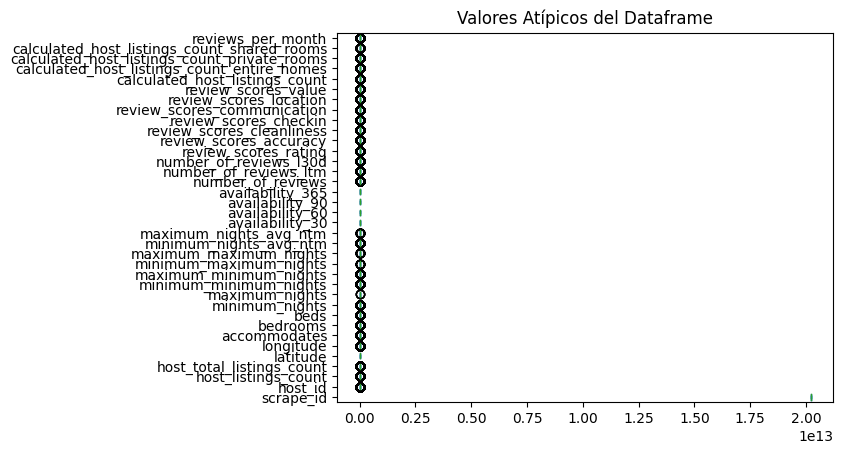

In [89]:
fig = plt.figure(figsize =(15, 8))
numericas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [90]:
y=numericas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.020000e+13
host_id                                         4.243084e+08
host_listings_count                             3.850000e+01
host_total_listings_count                       5.700000e+01
latitude                                        3.783859e+01
longitude                                      -1.223622e+02
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.769000e+03
minimum_minimum_nights                          7.200000e+01
maximum_minimum_nights                          7.200000e+01
minimum_maximum_nights                          2.677500e+03
maximum_maximum_nights                          2.677500e+03
minimum_nights_avg_ntm                          7.200000e+0

In [91]:
data4_iqr= numericas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

scrape_id                                          0
host_id                                          413
host_listings_count                             1128
host_total_listings_count                       1196
latitude                                           0
longitude                                        327
accommodates                                     279
bedrooms                                         228
beds                                             558
minimum_nights                                   200
maximum_nights                                     4
minimum_minimum_nights                           231
maximum_minimum_nights                           346
minimum_maximum_nights                            21
maximum_maximum_nights                            36
minimum_nights_avg_ntm                           341
maximum_nights_avg_ntm                            36
availability_30                                    0
availability_60                               

In [92]:
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


In [93]:
numericas = data5_iqr
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   scrape_id                                     6936 non-null   float64
 1   host_id                                       6936 non-null   float64
 2   host_listings_count                           6936 non-null   float64
 3   host_total_listings_count                     6936 non-null   float64
 4   latitude                                      6936 non-null   float64
 5   longitude                                     6936 non-null   float64
 6   accommodates                                  6936 non-null   float64
 7   bedrooms                                      6936 non-null   float64
 8   beds                                          6936 non-null   float64
 9   minimum_nights                                6936 non-null   f

###**Limpieza de datos (Categóricos)**

En el caso de la limpieza de datos nulos en las columnas categóricas, se aplicó un fillna mediante el método forward fill, en donde se completan los datos con el valor que tiene adelante del mismo. 

La razón por la que se aplicó este método es porque la columnas que está adelante del valor nulo es la que podría tener más sentido para poder complementar esa columnas sin tener que eliminar el valor, ya que de otra forma nos tendríamos que inventar el dato y eso dejaría de corresponder con la dispersión de los datos que tenemos. 

In [94]:
categoricas = categoricas.fillna(method="ffill")
categoricas.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

###**Concatener Datos limpios**

In [95]:
Datos_limpios = pd.concat([EUA['ï»¿id'], categoricas, numericas], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6936 non-null   object 
 6   neighborhood_overview                         6936 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_url                                      6936 non-null   object 
 9   host_name                                     6936 non-null   o

###**Enviar a CSV**

In [96]:
Datos_limpios.to_csv("California_EUA (Limpio).csv")
files.download("California_EUA (Limpio).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**México**

###**Exploración**

En esta parte se empieza por eliminar las columnas en donde todos sus datos sean nulos, por lo que al final nos quedamos sin ninguna columna vacía. 

Posteriormente, se dividieron los datos en aquellos que tengan variables numéricas y aquellas que cuentan con variables categóricas. 

In [97]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [98]:
Mexico = Mexico.dropna(axis = 1, how='all')
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [99]:
Mexico.isnull().sum().sum()

92713

In [100]:
numericas = Mexico._get_numeric_data()
categoricas = Mexico.drop(numericas, axis = 1)

###**Limpieza de datos (numéricos)**
En este punto se aplicó la función fillna para que se completaran los datos nulos con el promedio de la fila, puesto que se consideró que de esa forma no iba a afectar en cuanto a la distribución de los datos y nos permitiría poder explorar la información mantiendo casi las mismas caraceterísticas. 

Posteriormente se aplicó el método de los cuartiles para poder eliminar los valores atípicos. La razón por la cual se aplicó este método es debido a que es mucho más estricto al momento de considerar cuales datos son y cuales no son outliers. 

In [101]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   scrape_id                                     24224 non-null  int64  
 2   host_id                                       24224 non-null  int64  
 3   host_listings_count                           24224 non-null  int64  
 4   host_total_listings_count                     24224 non-null  int64  
 5   latitude                                      24224 non-null  float64
 6   longitude                                     24224 non-null  float64
 7   accommodates                                  24224 non-null  int64  
 8   bedrooms                                      23669 non-null  float64
 9   beds                                          23953 non-null 

In [102]:
data = numericas.copy()
numericas = numericas.fillna(round(data.mean(),1))
numericas.isnull().sum().sum()

0

In [103]:
numericas = numericas.drop(["id"], axis=1)

<Figure size 1500x800 with 0 Axes>

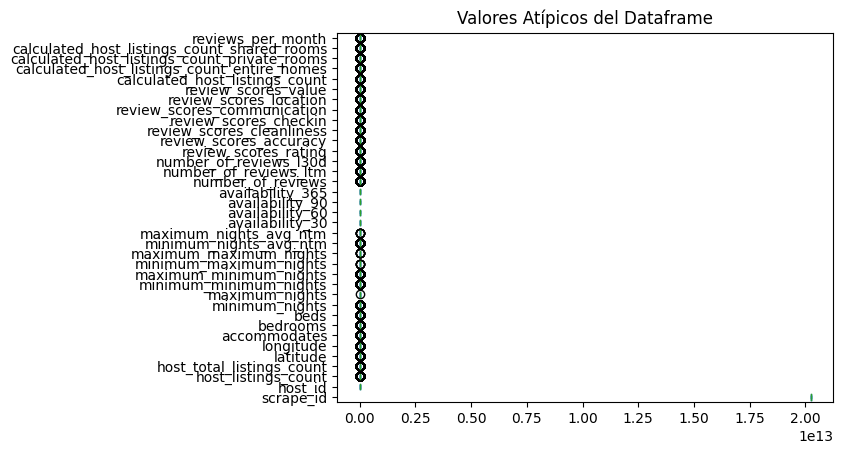

In [104]:
fig = plt.figure(figsize =(15, 8))
numericas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [105]:
y=numericas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+00
minimum_maximum_nights                          2.265000e+03
maximum_maximum_nights                          2.265000e+03
minimum_nights_avg_ntm                          5.750000e+0

In [106]:
data4_iqr= numericas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

scrape_id                                          0
host_id                                            0
host_listings_count                             3324
host_total_listings_count                       3453
latitude                                        1490
longitude                                       2594
accommodates                                    1090
bedrooms                                         640
beds                                            2347
minimum_nights                                  3195
maximum_nights                                     1
minimum_minimum_nights                          3082
maximum_minimum_nights                          1895
minimum_maximum_nights                             5
maximum_maximum_nights                             6
minimum_nights_avg_ntm                          1929
maximum_nights_avg_ntm                             6
availability_30                                    0
availability_60                               

In [107]:
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


In [108]:
numericas = data5_iqr
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   scrape_id                                     24224 non-null  int64  
 1   host_id                                       24224 non-null  int64  
 2   host_listings_count                           24224 non-null  float64
 3   host_total_listings_count                     24224 non-null  float64
 4   latitude                                      24224 non-null  float64
 5   longitude                                     24224 non-null  float64
 6   accommodates                                  24224 non-null  float64
 7   bedrooms                                      24224 non-null  float64
 8   beds                                          24224 non-null  float64
 9   minimum_nights                                24224 non-null 

###**Limpieza de datos (Categóricos)**

En el caso de la limpieza de datos nulos en las columnas categóricas, se aplicó un fillna mediante el método forward fill, en donde se completan los datos con el valor que tiene adelante del mismo. Después como no se llenaron todos los datos nulos, se corrió otra vez un código similar, pero ahora usando backward fill. 

La razón por la que se aplicó este método es porque la columnas que está adelante del valor nulo es la que podría tener más sentido para poder complementar esa columnas sin tener que eliminar el valor, ya que de otra forma nos tendríamos que inventar el dato y eso dejaría de corresponder con la dispersión de los datos que tenemos. 

Y la razón por la cual se aplicó por segunda vez el método, es porque puede que algunos valores no tengan un valor antes del valor nulo, por lo que para rellenarlo debemos de usar el de después. 

In [109]:
categoricas = categoricas.fillna(method="ffill")
categoricas = categoricas.fillna(method="bfill")
categoricas.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

###**Concatener Datos limpios**

In [110]:
Datos_limpios = pd.concat([Mexico['id'], categoricas, numericas], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   last_scraped                                  24224 non-null  object 
 3   source                                        24224 non-null  object 
 4   name                                          24224 non-null  object 
 5   description                                   24224 non-null  object 
 6   neighborhood_overview                         24224 non-null  object 
 7   picture_url                                   24224 non-null  object 
 8   host_url                                      24224 non-null  object 
 9   host_name                                     24224 non-null 

###**Enviar a CSV**

In [111]:
Datos_limpios.to_csv("DF_Mexico (Limpio).csv")
files.download("DF_Mexico (Limpio).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**España**

###**Exploración**

En esta parte se empieza por eliminar las columnas en donde todos sus datos sean nulos, por lo que al final nos quedamos sin ninguna columna vacía. 

Posteriormente, se dividieron los datos en aquellos que tengan variables numéricas y aquellas que cuentan con variables categóricas. 

In [112]:
Espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [113]:
Espana = Espana.dropna(axis = 1, how='all')
Espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [114]:
Espana.isnull().sum().sum()

115665

In [115]:
numericas = Espana._get_numeric_data()
categoricas = Espana.drop(numericas, axis = 1)

###**Limpieza de datos (numéricos)**
En este punto se aplicó la función fillna para que se completaran los datos nulos con el promedio de la fila, puesto que se consideró que de esa forma no iba a afectar en cuanto a la distribución de los datos y nos permitiría poder explorar la información mantiendo casi las mismas caraceterísticas. 

Posteriormente se aplicó el método de los cuartiles para poder eliminar los valores atípicos. La razón por la cual se aplicó este método es debido a que es mucho más estricto al momento de considerar cuales datos son y cuales no son outliers. 

In [116]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   scrape_id                                     19655 non-null  float64
 2   host_id                                       19655 non-null  int64  
 3   host_listings_count                           19538 non-null  float64
 4   host_total_listings_count                     19538 non-null  float64
 5   latitude                                      19655 non-null  float64
 6   longitude                                     19655 non-null  float64
 7   accommodates                                  19655 non-null  int64  
 8   bedrooms                                      19152 non-null  float64
 9   beds                                          19562 non-null 

In [117]:
data = numericas.copy()
numericas = numericas.fillna(round(data.mean(),1))
numericas.isnull().sum().sum()

0

In [118]:
numericas = numericas.drop(["id"], axis=1)

<Figure size 1500x800 with 0 Axes>

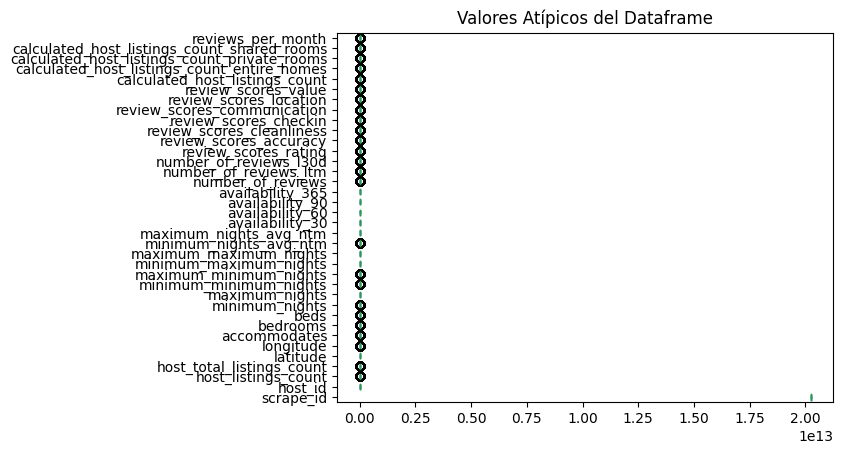

In [119]:
fig = plt.figure(figsize =(15, 8))
numericas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [120]:
y=numericas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.298792e+08
host_listings_count                             1.560000e+02
host_total_listings_count                       2.270000e+02
latitude                                        4.288548e+01
longitude                                       3.623007e+00
accommodates                                    9.000000e+00
bedrooms                                        4.500000e+00
beds                                            9.500000e+00
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+01
minimum_maximum_nights                          2.767500e+03
maximum_maximum_nights                          2.265000e+03
minimum_nights_avg_ntm                          9.500000e+0

In [121]:
data4_iqr= numericas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

scrape_id                                          0
host_id                                            0
host_listings_count                             1682
host_total_listings_count                       2447
latitude                                           0
longitude                                        926
accommodates                                    1616
bedrooms                                        1355
beds                                             565
minimum_nights                                   449
maximum_nights                                     0
minimum_minimum_nights                           434
maximum_minimum_nights                          1009
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           607
maximum_nights_avg_ntm                             0
availability_30                                    0
availability_60                               

In [122]:
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0


In [123]:
numericas = data5_iqr
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   scrape_id                                     19655 non-null  float64
 1   host_id                                       19655 non-null  int64  
 2   host_listings_count                           19655 non-null  float64
 3   host_total_listings_count                     19655 non-null  float64
 4   latitude                                      19655 non-null  float64
 5   longitude                                     19655 non-null  float64
 6   accommodates                                  19655 non-null  float64
 7   bedrooms                                      19655 non-null  float64
 8   beds                                          19655 non-null  float64
 9   minimum_nights                                19655 non-null 

###**Limpieza de datos (Categóricos)**

En el caso de la limpieza de datos nulos en las columnas categóricas, se aplicó un fillna mediante el método forward fill, en donde se completan los datos con el valor que tiene adelante del mismo. Después como no se llenaron todos los datos nulos, se corrió otra vez un código similar, pero ahora usando backward fill. 

La razón por la que se aplicó este método es porque la columnas que está adelante del valor nulo es la que podría tener más sentido para poder complementar esa columnas sin tener que eliminar el valor, ya que de otra forma nos tendríamos que inventar el dato y eso dejaría de corresponder con la dispersión de los datos que tenemos. 

Y la razón por la cual se aplicó por segunda vez el método, es porque puede que algunos valores no tengan un valor antes del valor nulo, por lo que para rellenarlo debemos de usar el de después. 

In [124]:
categoricas = categoricas.fillna(method="ffill")
categoricas = categoricas.fillna(method="bfill")
categoricas.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
price                     0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

###**Concatener Datos limpios**

In [125]:
Datos_limpios = pd.concat([Espana['id'], categoricas, numericas], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   last_scraped                                  19655 non-null  object 
 3   source                                        19655 non-null  object 
 4   name                                          19655 non-null  object 
 5   description                                   19655 non-null  object 
 6   neighborhood_overview                         19655 non-null  object 
 7   picture_url                                   19655 non-null  object 
 8   host_url                                      19655 non-null  object 
 9   host_name                                     19655 non-null 

###**Enviar a CSV**

In [126]:
Datos_limpios.to_csv("Girona_España (Limpio).csv")
files.download("Girona_España (Limpio).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>